Univerzitet u Sarajevu
<br> Elektrotehnički fakultet
#### **Predmet: Multimedijalni Sistemi**

# Laboratorijska vježba 07: Uzorkovanje i kvantizacija

Za izradu laboratorijske vježbe treba koristiti odgovarajuću Jupyter Notebook datoteku. Urađenu vježbu je potrebno konvertirati u PDF format, a zatim je PDF datoteku potrebno predati do postavljenog roka koristeći platformu Zamger.

Ime i prezime studenta, broj indeksa:

Amar Hasečić

Datum izrade izvještaja:

07.05.2024

---

## Zadatak 1.

Potrebno je implementirati funkciju <code>sinusoida(*pocetak*, *kraj*, *frekv*)</code> koja izračunava funkciju <code>*y*=sin(*x*)</code> u intervalu [pocetak, kraj] sa korakom <code>1/*frekv*</code>. Ova funkcija kao rezultat treba vratiti niz vrijednosti *x* i *y*, respektivno.

Nakon toga potrebno je implementirati funkciju <code>uzorkovanje(*x*, *y*, *fuzor*, *frekv*)</code> koja uzorkuje  funkciju *y* u specifičnim tačkama *x*. Funkcija vraća nove uzorkovane nizove *xnew* i *ynew*. Parametar <code>*fuzor*</code> definira frekvenciju uzorkovanja na način da se novi uzorkovani nizovi *xnew* i *ynew*  formiraju tako da se iz postojećih nizova *x* i *y* uzima svaki <code>*frekv/fuzor*</code> uzorak.

Naprimjer, ukoliko su definirane sljedeće vrijednosti:

<code>
x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0],
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0],
frekv = 10,
fuzor = 5,
</code>

potrebno je da rezultat izvođenja funkcije budu sljedeće vrijednosti:

<code>
xnew = [0, 0.2, 0.4, 0.6, 0.8, 0]
ynew = [0, 2, 4, 6, 8, 0]
</code>

Kako je frekvencija uzorkovanja *fuzor* dva puta manja od frekvencije *frekv* kojom je prikazan originalni signal, to se uzima svaki drugi uzorak iz nizova *x* i *y*. Detaljne informacije o uzorkovanju se mogu naći U PDF materijalima na platformi C2 (poglavlje 4, str 106).

**Rješenje:**

In [22]:
import numpy as np
def sinusoida(pocetak,kraj,frekv):
    x = np.arange(pocetak, kraj+ 1/frekv, 1/frekv)
    y = np.sin(x)
    return x, y

def uzorkovanje(x,y,fuzor,frekv):
    xnew = []
    ynew = []

    for i in range(0, len(x), int(frekv/fuzor)):
        xnew.append(x[i])

    for i in range(0, len(y), int(frekv/fuzor)):
        ynew.append(y[i])
    
    return xnew, ynew
    

Nakon implementacije funkcije, potrebno je izvesti programski kod ispod kako bi se dobio prikazani ispis. Osim toga, potrebno je dodati još dva primjera uzorkovanja (jedan primjer bez pojave alijasinga i jedan primjer sa pojavom alijasinga) sa proizvoljno od strane studenta odabranim frekvencijama uzorkovanja *fnovo* i proizvoljno odabranim parametrima *kraj*.

Uzorkovanje-bez pojave  alijasinga:


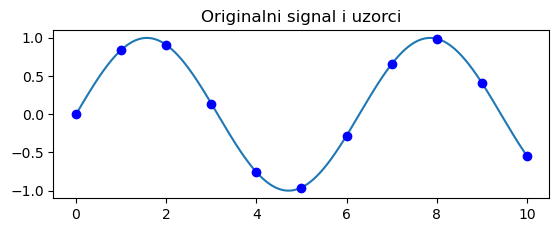

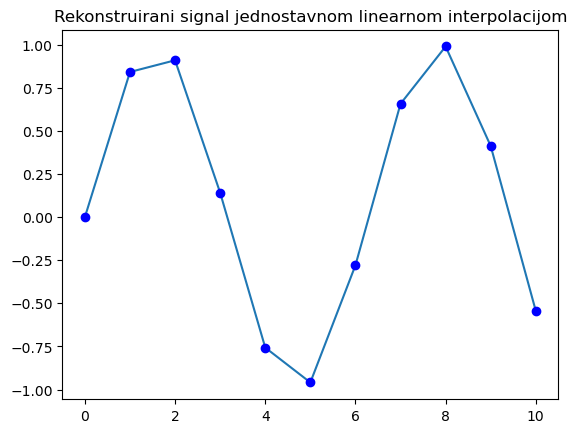

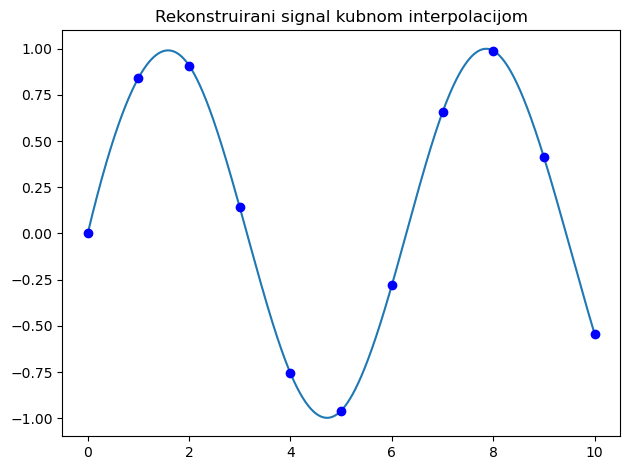

Uzorkovanje-sa pojavom alijasinga:


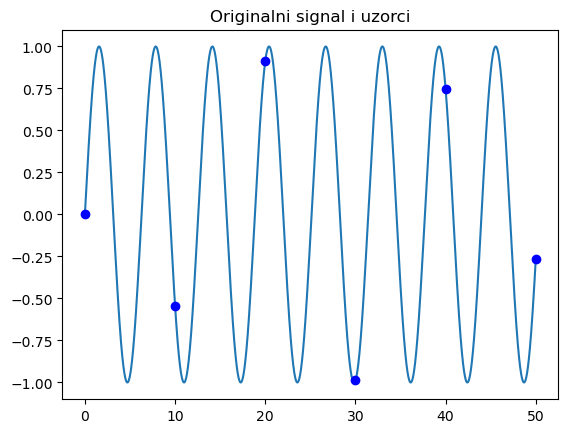

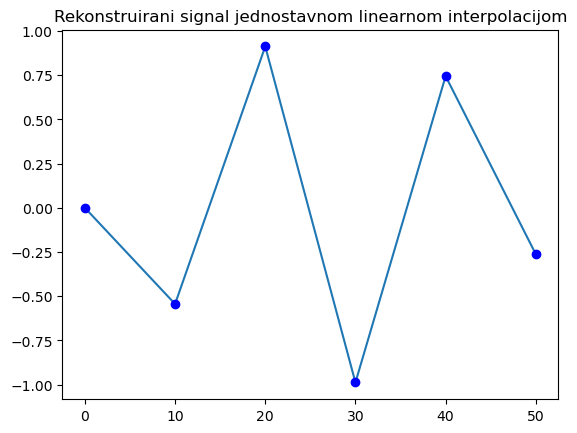

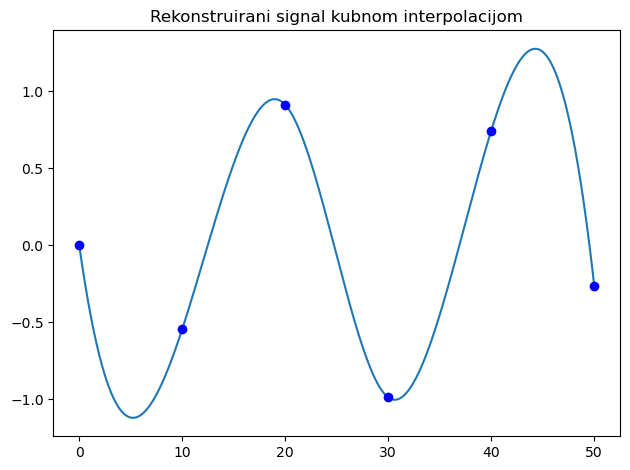

In [23]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

[x, y] = sinusoida(0, 10, 1000)
[xnew, ynew] = uzorkovanje(x, y, 1, 1000)

print("Uzorkovanje-bez pojave  alijasinga:")

plt.figure(1)
plt.subplot(211)
plt.title('Originalni signal i uzorci')      
plt.plot(x, y)
plt.plot(xnew, ynew,'bo')
plt.figure(2)
plt.title('Rekonstruirani signal jednostavnom linearnom interpolacijom')
plt.plot(xnew, ynew)
plt.plot(xnew, ynew,'bo')
plt.figure(3)
plt.title('Rekonstruirani signal kubnom interpolacijom')
iy = interp1d(xnew, ynew,kind='cubic')
plt.plot(x, iy(x))
plt.plot(xnew, ynew,'bo')
plt.tight_layout()
plt.show()

[x, y] = sinusoida(0, 50, 1000)
[xnew, ynew] = uzorkovanje(x, y, 0.1, 1000)

print("Uzorkovanje-sa pojavom alijasinga:")

plt.figure(1)
plt.title('Originalni signal i uzorci')      
plt.plot(x, y)
plt.plot(xnew, ynew,'bo')
plt.figure(2)
plt.title('Rekonstruirani signal jednostavnom linearnom interpolacijom')
plt.plot(xnew, ynew)
plt.plot(xnew, ynew,'bo')
plt.figure(3)
plt.title('Rekonstruirani signal kubnom interpolacijom')
iy = interp1d(xnew, ynew,kind='cubic')
plt.plot(x, iy(x))
plt.plot(xnew, ynew,'bo')
plt.tight_layout()
plt.show()

---

## Zadatak 2.

Potrebno je implementirati funkciju <code>kvantizacija(*y*, *broj_nivoa*)</code> koja izvodi kvantizaciju niza vrijednosti <code>*y*</code> na broj kvantizacijskih nivoa <code>*broj_nivoa*</code>. Ova funkcija kao rezultat treba vratiti novi niz kvantiziranih vrijednsti.

Izračunavanje vrijednosti svakog nivoa se izvodi prema sljedećoj formuli:

![](https://docs.google.com/uc?export=download&id=1N6O7ynm1nRpX2nttOpMD1VGmnLCExxcv),

pri čemu <code>*r*</code> predstavlja rezoluciju tj. korak kvantizacije, a <code>*qi*</code> predstavlja vrijednost kvantizacijskog nivoa na poziciji <code>*i*</code>, pri čemu je <code>*n*</code> broj kvantizacijskih nivoa.

Nakon određivanja svih kvantizacijskih nivoa, svakoj vrijednosti <code>*y*</code> potrebno je dodijeliti vrijednost onog kvantizacijskog nivoa koji je najbliži stvarnoj vrijednosti *y*.

Naprimjer, ukoliko su definisane sljedeće vrijednosti:

<code>
y = [0, 0.2, 0.4, 0.6, 0.8, 1],
n = 3,
</code>

potrebno je da rezultat funkcije budu sljedeće vrijednosti:

<code>
y = [0, 0, 0.5, 0.5, 1, 1],
</code>

jer je rezolucija jednaka 0.5 za 3 kvantizacijska nivoa između 0 i 1, a kvantizacijski nivoi su 0, 0.5 i 1.

Detaljne informacije o kvantizaciji se mogu naći U PDF materijalima na platformi C2 (poglavlje 4, str 106).

**Rješenje:**

Nakon implementacije funkcije, potrebno je izvesti programski kod ispod kako bi se dobio prikazani ispis. Osim toga, potrebno je dodati još dva primjera kvantizacije sa proizvoljnim brojem kvantizacijskih nivoa (jedan primjer gdje je *broj_nivoa* > 8 i jedan primjer gdje je *broj_nivoa* < 8).

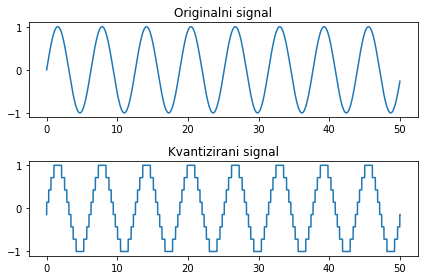

In [4]:
import matplotlib.pyplot as plt

[x, y] = sinusoida(0, 50, 1000)
ynew = kvantizacija(y, 8)

plt.figure(1)
plt.subplot(211)
plt.title('Originalni signal')      
plt.plot(x, y)
plt.subplot(212)           
plt.title('Kvantizirani signal')
plt.plot(x, ynew)
plt.tight_layout()
plt.show()